# FIAP CheckPoint 2025-04 - Análise básica de dataset
Análise produzida em colaboração com:

* RM 561728 Arthur Bezerra
* RM 565355 Lucas Hideki
* RM 565463 Bira Lavor

# 1. Loading and initial visualization of data
## 1.1 Sample theme
The dataset is about consumption habits of various types of coffee.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/kaggle/input/coffee-sales-dataset/Coffe_sales.csv


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


## 1.2 Sample period
The dataset has a start and end date for consumer behavior observations. We therefore have a sample of almost 13 months of observation.
This led us to ask ourselves: `why would the observer have performed the mapping again in March 2025?`

Start date: 2024-03-01<br>
End date: 2025-03-23<br>
Observation period: **387 days**<br>

Dataset size: **3547 samples**

In [2]:
start = df['Date'].min()
end = df['Date'].max()
print("Data de início: " + start)
print("Data de encerramento: " + end)
print("Período: " + str((pd.to_datetime(end) - pd.to_datetime(start)).days) + " dias")
print("")
df.info()

Data de início: 2024-03-01
Data de encerramento: 2025-03-23
Período: 387 dias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


# 2. Tratamento de Dados faltantes

Originalmente nesse dataset **não há dados faltantes**

In [3]:
df.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

# 3.Exploração descritiva dos dados
## 3.1 Variáveis do dataset

### Variáveis do tipo Numérico:
* `hour_of_day` indica qual a **faixa de horário** que a compra foi observada
* `money` indica em US$ dólares qual foi o **custo** da compra observada
* `Weekdaysort` indica qual **dia da semana** a compra foi observada
* `Monthsort` indica em qual **mês** a compra foi observada

### Variáveis tipo String:
* `cash_type` indica formato de pagamento. Imaginamos que a opção Cash iria aparecer, mas o resultado foi que 100% da base pagou com Card. Isso mais indica sobre a loja, do que sobre o consumidor. Possivelmente, o local não aceita pagamento em `cash`.
* `coffee_name` indica o nome do café vendido entre as opções: Latte, Hot Chocolate, Americano, Americano with Milk, Cocoa, Cortado, Espresso, Cappuccino
* `Time_of_Day` indica turno da compra, entre as opções: Morning, Afternoon, Night
* `Weekday` indica o dia da semana, com 7 opções.
* `Month_name` indica o mês da compra, com 12 opções.

In [4]:
cash_type_alltypes = df['cash_type'].unique()
coffee_name_alltypes = df['coffee_name'].unique()
time_of_day_alltypes = df['Time_of_Day'].unique()
weekday_alltypes = df['Weekday'].unique()
monthname_alltypes = df['Month_name'].unique()
print("Cash Type options: " + ", ".join(cash_type_alltypes))
print("Coffee Names options: " + ", ".join(coffee_name_alltypes))
print("Time Of Day options: " + ", ".join(time_of_day_alltypes))
print("Weekday options (" + str(len(weekday_alltypes)) + ") : " + ", ".join(weekday_alltypes))
print("Month Name options (" + str(len(monthname_alltypes)) + "): " + ", ".join(monthname_alltypes))



Cash Type options: card
Coffee Names options: Latte, Hot Chocolate, Americano, Americano with Milk, Cocoa, Cortado, Espresso, Cappuccino
Time Of Day options: Morning, Afternoon, Night
Weekday options (7) : Fri, Sat, Sun, Mon, Tue, Wed, Thu
Month Name options (12): Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, Jan, Feb


## 3.2 Adaptando variáveis do dataset
A variável `Date` está em formato `object`. O ideal era que ela estivesse em um formato `datetime` para facilitar análises futuras.

In [5]:
print("Old dataset 'Date' type: ", end="")
print(df.dtypes['Date'])
df['Date'] = pd.to_datetime(df['Date'])
print("New dataset 'Date' type: ", end="")
print(df.dtypes['Date'])


Old dataset 'Date' type: object
New dataset 'Date' type: datetime64[ns]


## 3.3 Estatísticas básicas: Custos mínimos e máximos
Dentre as 4 variáveis numéricas (`hour_of_day`, `money`, `Weekdaysort`, `Monthsort`), é possível observar que todas elas foram usadas com comportamento similar ao boleano, exceto `money`. Sendo assim, conseguimos entender que:

1. A média de gastos no período da amostra foi de 31.64 dólares
2. O valor mínimo foi de 18.12 e o custo da maior compra foi de 38.70 dólares

In [6]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort,Date
count,3547.000000,3547.000000,3547.000000,3547.000000,3547
mean,14.185791,31.645216,3.845785,6.453905,2024-10-04 17:34:43.676346368
min,6.000000,18.120000,1.000000,1.000000,2024-03-01 00:00:00
25%,10.000000,27.920000,2.000000,3.000000,2024-07-17 12:00:00
50%,14.000000,32.820000,4.000000,7.000000,2024-10-10 00:00:00
75%,18.000000,35.760000,6.000000,10.000000,2025-01-11 00:00:00
max,22.000000,38.700000,7.000000,12.000000,2025-03-23 00:00:00
std,4.234010,4.877754,1.971501,3.500754,NaN


## 3.4 Estatísticas básicas: Previsibilidade de compra
Se há um cliente com intenção de compra, há também **50% de chance dele consumir entre 27.92 e 35.76** dólares

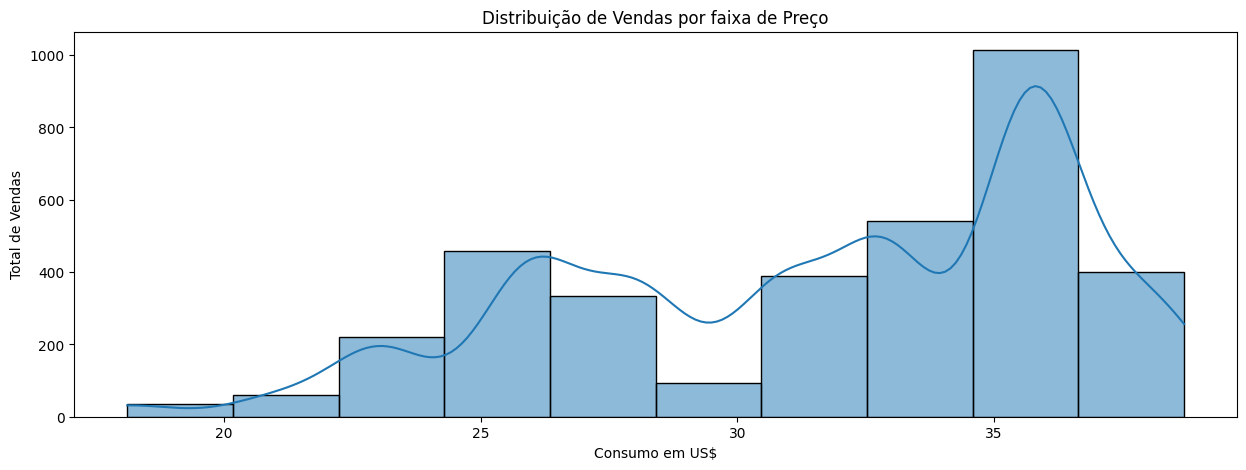

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Ignore all warnings temporarily. Sorry, Prof. Felipe 😬
warnings.filterwarnings('ignore')

fixed_Nan_money = df['money'].replace([np.inf, -np.inf], np.nan)

plt.figure(figsize=(15, 5))
sns.histplot(fixed_Nan_money.dropna(), bins=10, kde=True)
plt.title('Distribuição de Vendas por faixa de Preço')
plt.xlabel('Consumo em US$')
plt.ylabel('Total de Vendas')
plt.show()

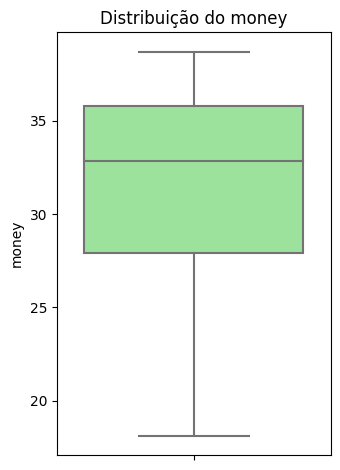

In [8]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df['money'], color='lightgreen')
plt.title('Distribuição do money')
plt.tight_layout()

# 4 Criando Visualizações
## 4.1 Levantamento de hipóteses: Acordar, Executar, Recomeçar
Percebe-se que há 3 grandes picos e 1 situação especial, nas quais nos ajuda a levantar algumas hipóteses:

### A >>> Café para acordar a mente
Pessoas usam o café para `acordar` a mente e inicir o dia de trabalho (primeiro pico). Porém não há como inferir ainda se essas pessoas usam somente café para o `breakfast`

### B >>> Café: o primeiro a chegar em reuniões 
Antes do meio-dia, o café é usado para tentar aproveitar o resto da manhã e aumentar a eficácia dos processos mentais. Dado que o dataset é contemporâneo (2024), pode-se inferir que o segundo pico está associado ao pico de horário das reuniões da manhã, no modelo capitalista de trabalho.

### C >>> Recarga do almoço ou no papo das 16h
É importante dividir o terceiro pico em dois blocos (`C1` e `C2`) para facilitar o entendimento. O bloco `C1` foram pessoas que provavelmente não estavam em reuniões do segundo pico e agora precisam de sua dose de cafeína para "acordar a mente", logo após o almoço. Já no bloco `C2` podemos supor que são a maioria das pessoas que estavam no pico 2 (das reuniões). Ambos `C1` e `C2` estão num looping de trabalhar muito, descansar pouco e usar o café como se fosse o `nitro_gas` dos motores de carros de competição, a no máximo 4 horas de intervalo entre cada shot.

### D >>> Café noturno até capotar no teclado
A situação especial refere-se ao quarto pico de consumo de café. Isso não seria um problema, se não fosse o horário: das 19:00 às 22:00. A sociedade entrou num clico de cobrança e resultado, onde a maioria das pessoas não consegue fazer as entregas das 08:00 às 18:00, sendo geralmente necessário "esticar" a carga horária.

Ao longo das próximas análises, vamos **confirmar** ou **refutar** as hipóteses acima.

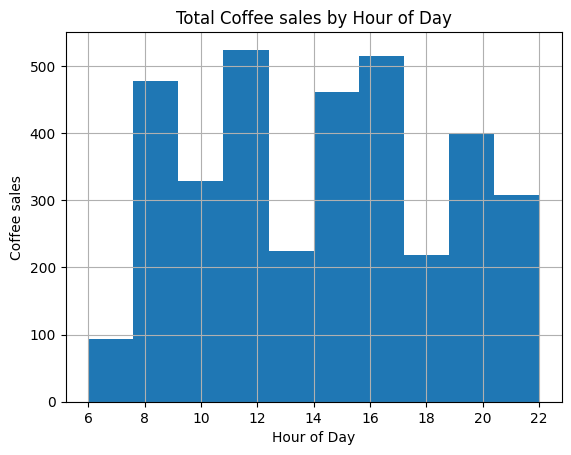

In [9]:
df.hour_of_day.hist(bins=10)
plt.title("Total Coffee sales by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Coffee sales")
plt.show()

## 4.2 Bebidas mais vendidas

Vamos supor que o local é observado é USA e a equipe barista mantém como receita:
1. `Americano with milk`:  2 doses de café espresso, 3 doses de água, 1 dose de leite.
2. `Latte`: 2 doses de café espresso, 4 doses de leite vaporizado, 1 dose de espuma de leite.
3. `Americano`: 2 doses de café espresso, 0 doses de leite, 4 doses de água. Ou seja: `Americano` contém 2x mais cafeína
5. `Cappucino`: 2 doses de café espresso, 2 doses de leite vaporizado, 2 doses de espuma de leite.
6. `Cortado`: 2 dose de expresso, 2 dose de leite morno
7. `Hot Chocolate`: 4 doses de leite, 2 doses de calda de chocolate, chantilly a gosto.
8. `Cocoa`: 4 doses de leite, 2 doses de cacau em pó, 1 dose de açúcar.
9. `Espresso`: 1 dose de café expresso, 0 doses de leite, 0 doses de água

É possível observar que **3 das 4 as bebidas mais vendidas, contém leite** em sua formulação.
O fato é que o leite deixa a bebida mais cremosa, menos ácida e traz uma certa sofisticação, tanto na textura quanto na apresentação da bebida. Além disso, a adição do leite ajuda a customizar a bebida com caldas especiais, tipo: amêndoas, aveia, soja, etc. Sabe-se que norte-americanos gostam de experiências personalizadas.

Por outro lado, o `espresso`, queridinho dos italianos, tem baixíssima venda no local observado. A cultura italiana indica que saborear um espresso é um momento de relaxamento, um prazer sem pressa, com muito aroma e notas específicas de cada grão e torra de café. Isso possivelmente é diferente da cultura norte-americana.

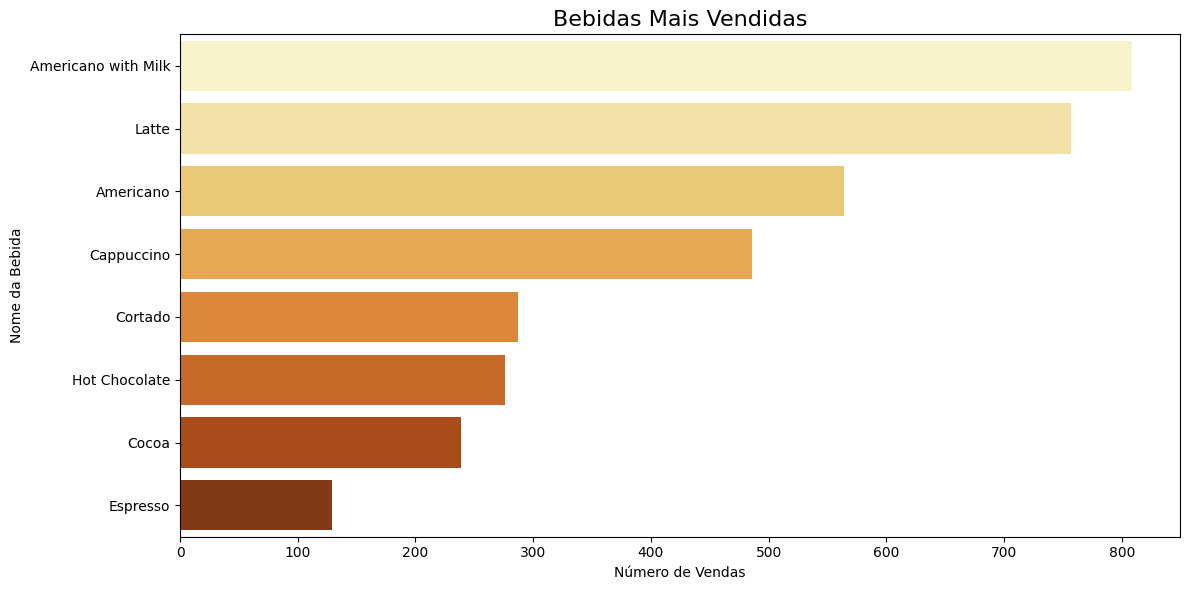

In [10]:
coffee_counts = df['coffee_name'].value_counts().reset_index()
coffee_counts.columns = ['coffee_name', 'sales']
 
plt.figure(figsize=(12,6))
sns.barplot(data=coffee_counts, x='sales', y='coffee_name', palette='YlOrBr')
 
plt.title("Bebidas Mais Vendidas", fontsize=16)
plt.xlabel("Número de Vendas")
plt.ylabel("Nome da Bebida")
plt.tight_layout()
plt.show()

# 5 Um tipo de café para cada tipo de pessoa

Considere que:
- Cafeína é uma droga natural que estimula o cérebro e o sistema nervoso central
- 1 dose de `Espresso` contém cerca de 47-75 mg de cafeína.
- Quanto mais leite na receita do café, mais lento será a absorção da cafeína no organismo.

Vamos analisar como algumas bebidas foram vendidas ao longo da semana, divididas por faixa de horário.

In [11]:
# Calculate the total count for each coffee to find the most popular ones
coffee_counts = df['coffee_name'].value_counts().reset_index()
coffee_counts.columns = ['coffee_name', 'total_sales']
display(coffee_counts)

# Group the data by all necessary dimensions. This is our master data source.
coffee_sales_grouped = df.groupby(['Weekday', 'hour_of_day', 'coffee_name']).size().reset_index(name='sales_count')

,coffee_name,total_sales
0,Americano with Milk,809
1,Latte,757
2,Americano,564
3,Cappuccino,486
4,Cortado,287
5,Hot Chocolate,276
6,Cocoa,239
7,Espresso,129


## 5.1 Americano with Milk
Vendas concentradas na parte da manhã ao longo da semana. Considerando que a adição de leite na bebida, dá conforto e textura e uma certa fornte de proteína, seria a bebida usada por aqueles que tem o costume de não tomar café da manhã?

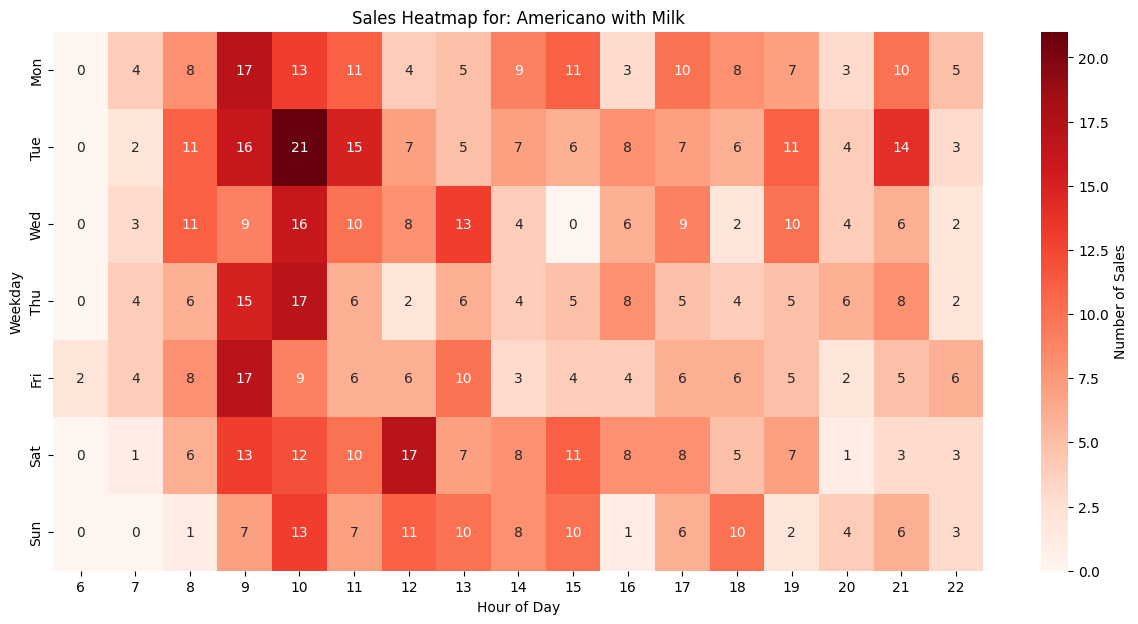

In [12]:
def generate_coffee_heatmap(coffee_name, grouped_data):
    """
    Generates and displays a sales heatmap for a specific coffee type.

    Args:
        coffee_name (str): The name of the coffee to plot.
        grouped_data (pd.DataFrame): The pre-grouped DataFrame containing sales counts.
    """
    # Filter the data for the chosen coffee
    coffee_data = grouped_data[grouped_data['coffee_name'] == coffee_name]

    if coffee_data.empty:
        print(f"No sales data found for '{coffee_name}'.")
        return

    # Pivot the data to create the heatmap structure
    coffee_pivot = coffee_data.pivot_table(index='Weekday', columns='hour_of_day', values='sales_count', fill_value=0)

    # Ensure a consistent order for weekdays and hours
    weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    all_hours = range(int(grouped_data['hour_of_day'].min()), int(grouped_data['hour_of_day'].max()) + 1)
    
    coffee_pivot = coffee_pivot.reindex(index=weekday_order, columns=all_hours, fill_value=0)

    # Plot the heatmap
    plt.figure(figsize=(15, 7))
    sns.heatmap(coffee_pivot, annot=True, fmt='.0f', cmap='Reds', cbar_kws={'label': 'Number of Sales'})
    plt.title(f'Sales Heatmap for: {coffee_name}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Weekday')
    plt.show()

actual_coffee_name = 'Americano with Milk'
generate_coffee_heatmap(actual_coffee_name, coffee_sales_grouped)

## 5.2 Latte
Essa é a bebida para a recarga das 16:00 ou para o papo da tarde, em especial para às `Segundas` ou `Terças`.

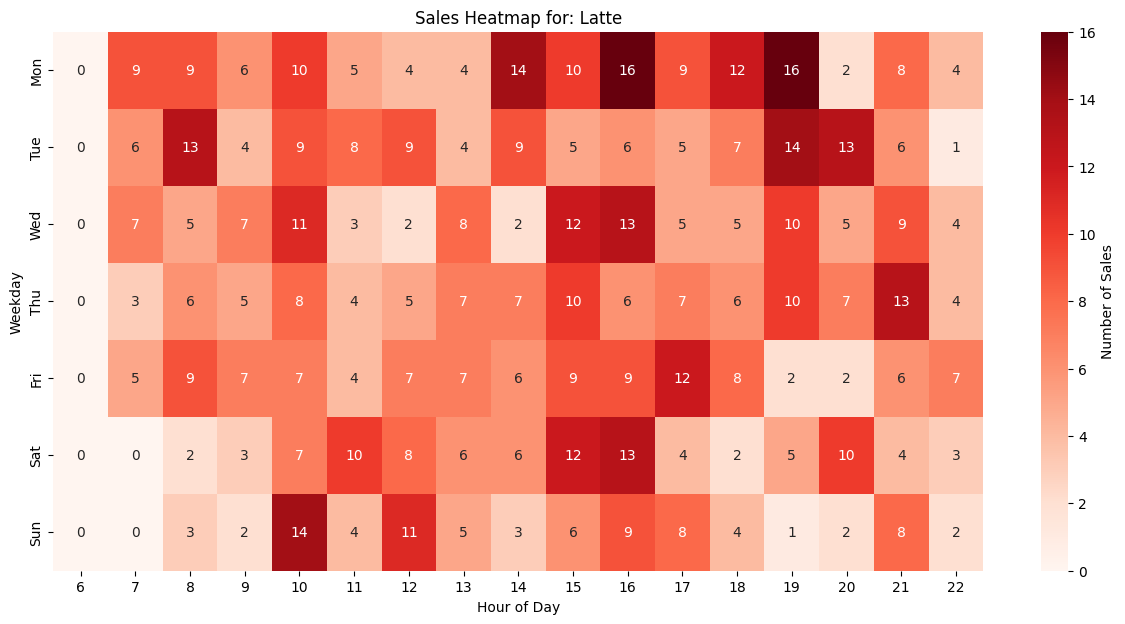

In [13]:
actual_coffee_name = 'Latte'
generate_coffee_heatmap(actual_coffee_name, coffee_sales_grouped)

## 5.3 Americano
Vendas concentradíssimas às `Quartas` no período da manhã.

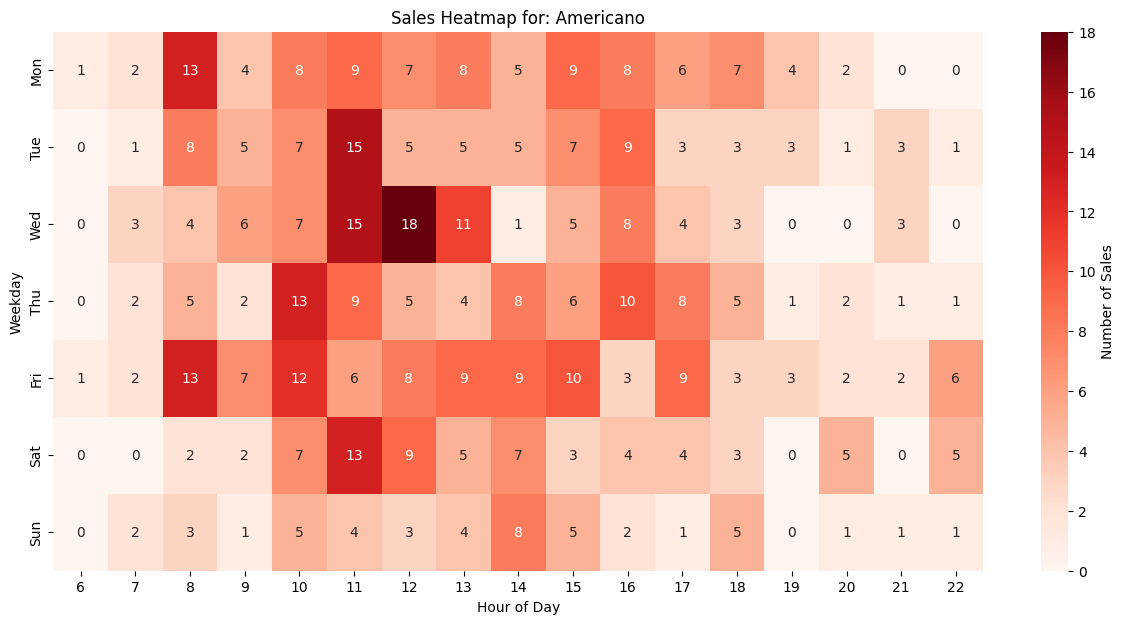

In [14]:
actual_coffee_name = 'Americano'
generate_coffee_heatmap(actual_coffee_name, coffee_sales_grouped)

## 5.4 Cappuccino
Cappuccino é uma bebida super confortante. Talvez seja por isso que é bastante consumida aos domingos pela manhã e às segundas para a pessoa se preparar para a semana.

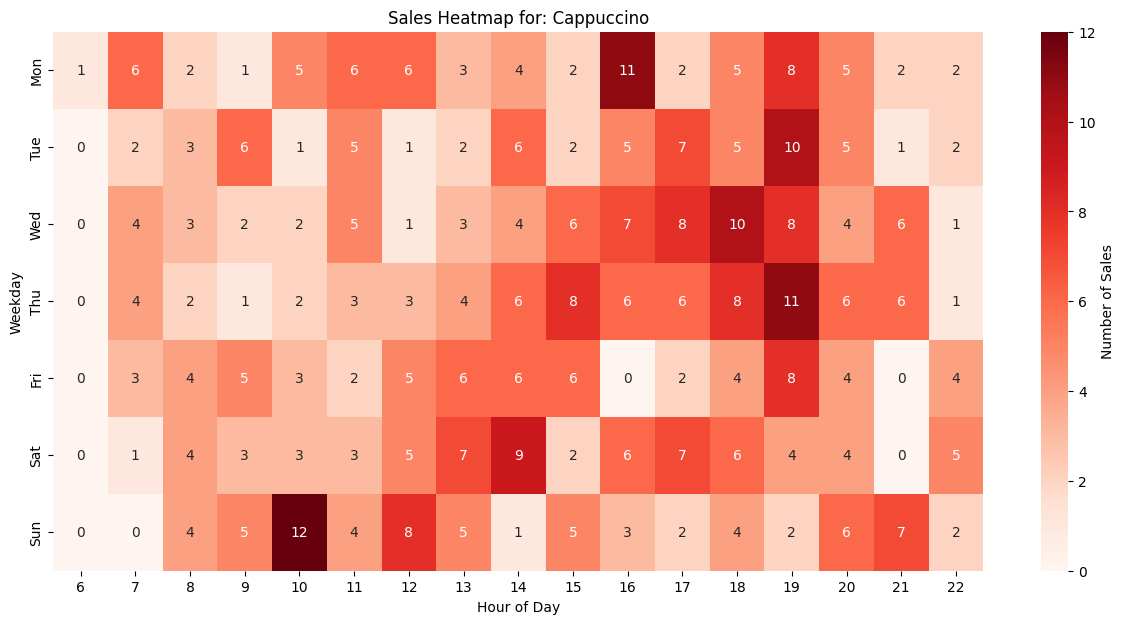

In [15]:
actual_coffee_name = 'Cappuccino'
generate_coffee_heatmap(actual_coffee_name, coffee_sales_grouped)

## 5.5 Espresso
Interessante observar que a bebida menos vendida ao longo do ano, tem pico de vendas aos `Sábados` pela manhã e às `Quartas` no final do dia.
Aqui, nos parece que são consumidores distintos. O consumidor da quarta talvez use o Cappuccino para acelerar as entregas do trabalho. Já o consumidor do `Sábado` há uma chance de ser um apreciador da bebida em momento de relaxamento.

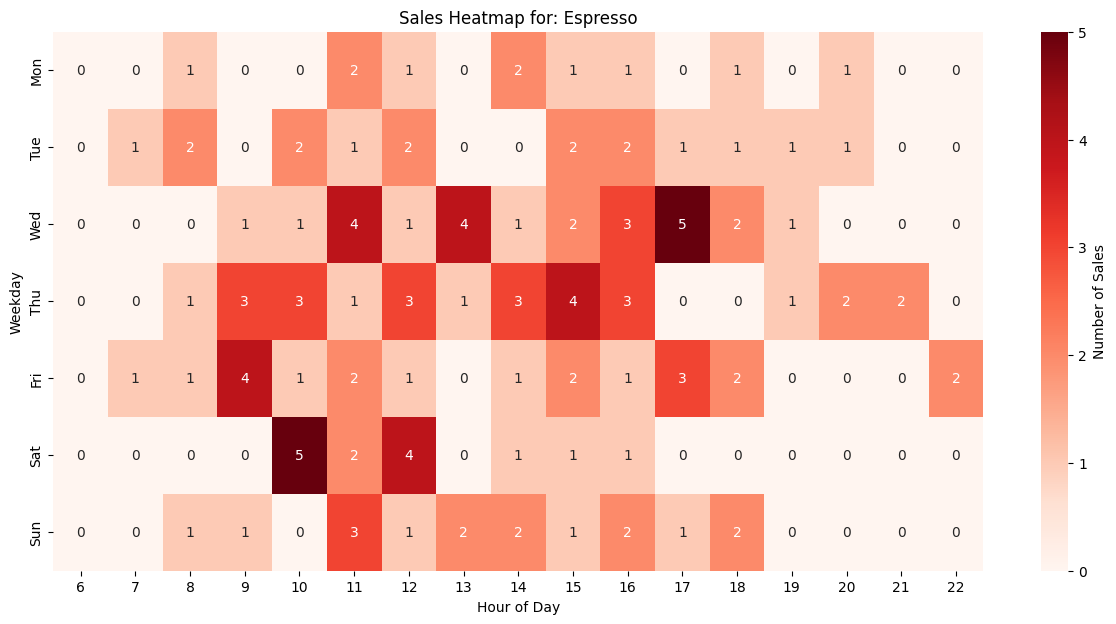

In [16]:
actual_coffee_name = 'Espresso'
generate_coffee_heatmap(actual_coffee_name, coffee_sales_grouped)

# 6 Comportamentos segmentados por período
## 6.1 Vendas ao longo do Ano

### Habilitando uma Feature Engineering
Precisamos verificar se a data é ou não final de semana para construir as análises seguintes.

In [17]:
# Create the 'isWeekend' feature
df['isWeekend'] = df['Weekday'].apply(lambda x: True if x in ['Sat', 'Sun'] else False)

# Display the first few rows with the new column
display(df.head())

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,isWeekend
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,False
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,False
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,False
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,False
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,False


### Estações do Ano: como elas impactam no comportamento de consumo?
Vamos agora analisar como o consumidor de café no local observado se comporta ao longo do ano. Para isso, partimos da premissa que as estações do ano no Hemisfério Norte são:
- 21/03 ~ 20/06 >>> Primavera
- 21/06 ~ 20/09 >>> Verão
- 21/09 ~ 20/12 >>> Outono
- 21/12 ~ 20/03 >>> Inverno

Era previsível que no **inverno** housse uma venda considerável de café. Mas, foi curioso observar que durante a **primavera** também há um forte consumo de café no local. Será que seria para observar a natureza, enquanto aprecia uma bebiba quentinha? Não saberemos, dado que não há informações se o local observado é uma cafeteria de rua ou dentro de uma empresa.

Plotting daily sales for top 5 coffees: ['Americano with Milk', 'Latte', 'Americano', 'Cappuccino', 'Cortado']


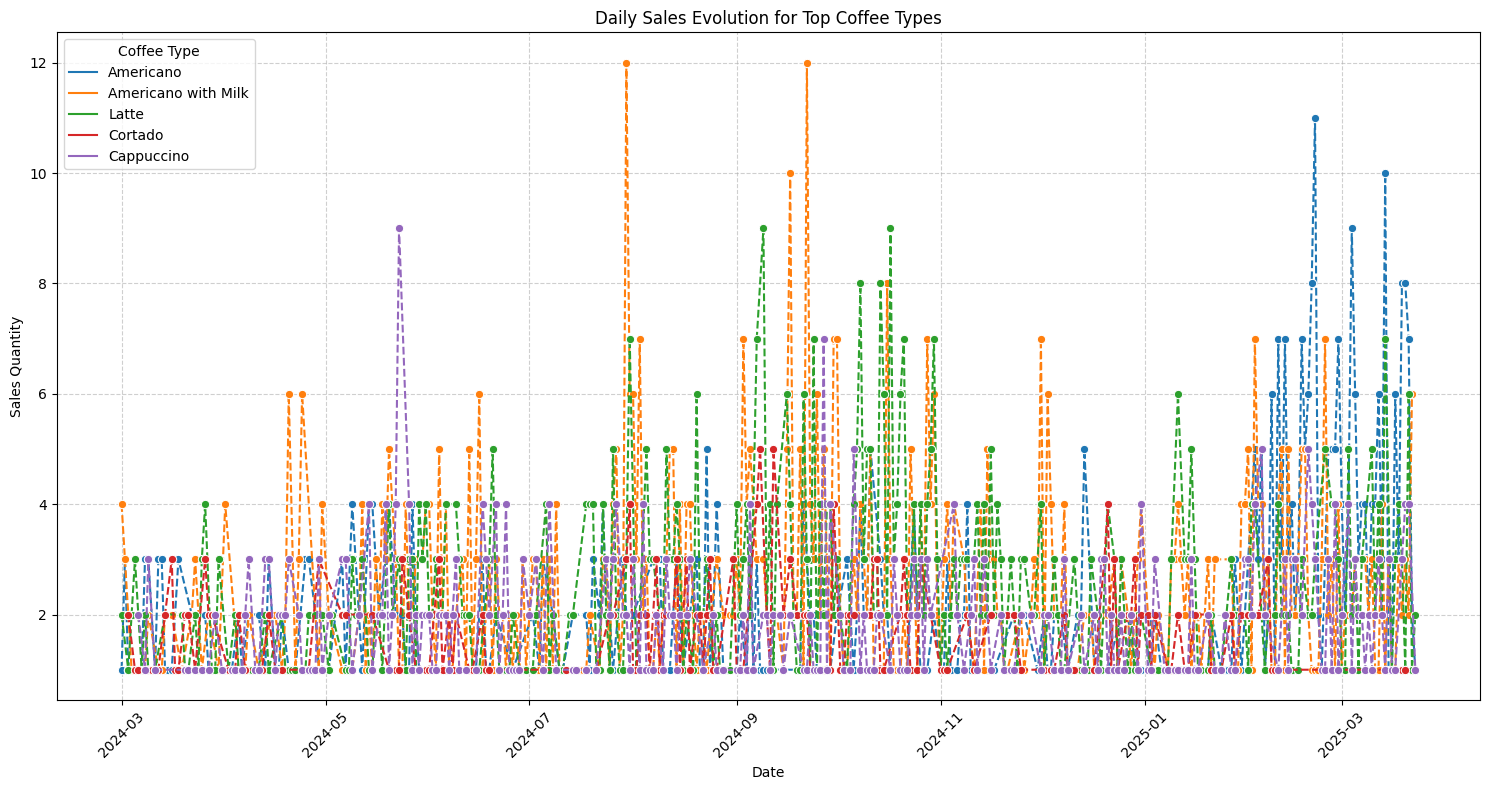

In [18]:
# --- 1. (Optional but Recommended) Find the top coffees to plot ---
# To avoid a cluttered chart, we'll focus on the top 5 sellers.
top_n = 5
top_coffee_types = df['coffee_name'].value_counts().nlargest(top_n).index.tolist()
print(f"Plotting daily sales for top {top_n} coffees: {top_coffee_types}")


# --- 2. Calculate daily sales for EACH coffee type ---
# Group by both 'Date' and 'coffee_name'
daily_sales_by_coffee = df.groupby(['Date', 'coffee_name']).size().reset_index(name='sales_count')


# --- 3. Filter the data to keep only the top coffees ---
# This makes the final plot much cleaner and easier to read.
df_top_coffees = daily_sales_by_coffee[daily_sales_by_coffee['coffee_name'].isin(top_coffee_types)]


# --- 4. Create the line plot ---
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=df_top_coffees,
    x='Date',
    y='sales_count',
    hue='coffee_name',  # <-- This creates a separate line for each coffee
    marker='o',         # Add markers to each data point
    linestyle='--'
)

plt.title('Daily Sales Evolution for Top Coffee Types')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Coffee Type')
# Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6.2 Comportamento ao longo da semana
Em todos os dias da semana, o consumo foi **muito forte** nas primeiras horas de trabalho do dia. Mas, há detalhes que vale evidenciar:
- O dia vencedor em vendas é a `Terça`
- Queda forte às 14h na `Quarta`, porém com picos de consumo no almoço e lanche da tarde
- Consumo médio ao longo do dia, porém acentuado às 21:00 da `Quinta` e `Domingo`.
- Tendência de baixas vendas na `Sexta`


🏆 The day with the highest total sales is: Tue


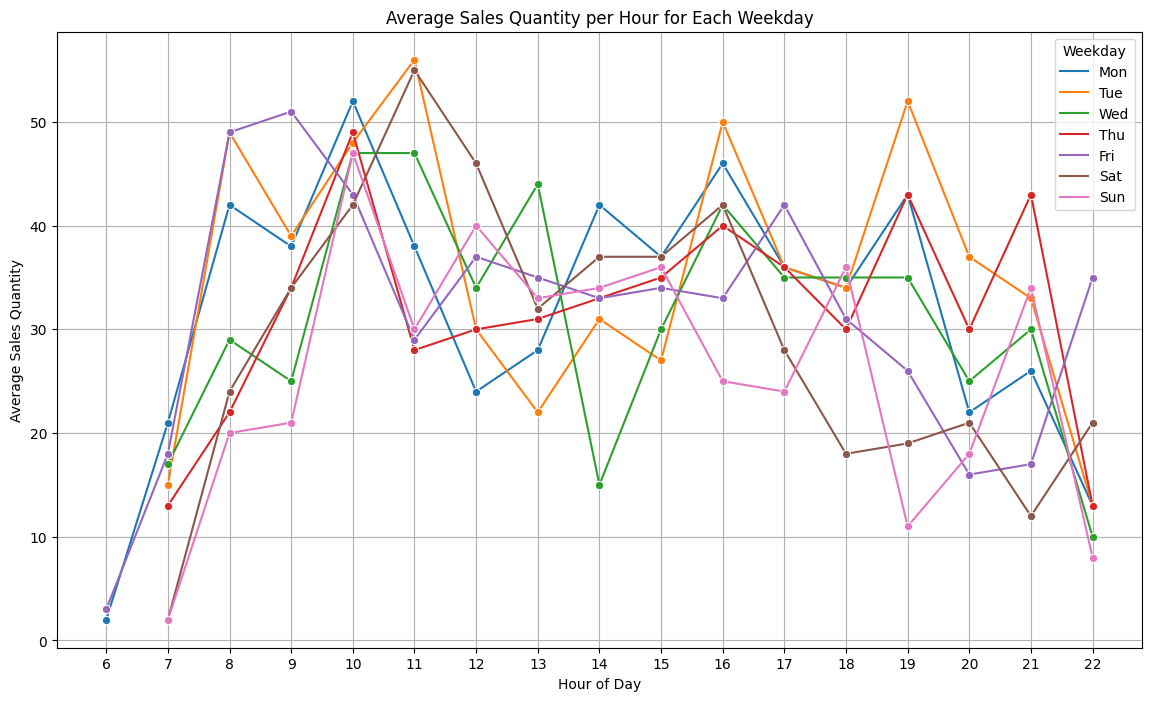

In [19]:
# --- Calculate average sales per hour for each weekday ---
# Group by weekday and hour, then calculate the mean of sales.
average_sales_per_hour_weekday = df.groupby(['Weekday', 'hour_of_day']).size().reset_index(name='average_sales')


# Reorder weekdays for plotting
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
average_sales_per_hour_weekday['Weekday'] = pd.Categorical(average_sales_per_hour_weekday['Weekday'], categories=weekday_order, ordered=True)
average_sales_per_hour_weekday = average_sales_per_hour_weekday.sort_values('Weekday')

total_sales_by_day = average_sales_per_hour_weekday.groupby('Weekday')['average_sales'].sum()
best_day = total_sales_by_day.idxmax()
print(f"🏆 The day with the highest total sales is: {best_day}")

# Create a line plot of average sales per hour for each weekday
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_sales_per_hour_weekday, x='hour_of_day', y='average_sales', hue='Weekday', marker='o')
 
plt.title('Average Sales Quantity per Hour for Each Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sales Quantity')
plt.xticks(average_sales_per_hour_weekday['hour_of_day'].unique()) # Ensure all hours are shown on x-axis
plt.grid(True)
plt.legend(title='Weekday')
plt.show()

# 7 Resposta às hipóteses
## A >>> Café para acordar a mente
O consumo de café foi muito evidente das 08:00 às 11:00 ao longo de toda a semana, com velocidade de subida menor aos finais de semana. 
Se isso não for usado para acordar a mente, certamente o intestino será acordado 😅

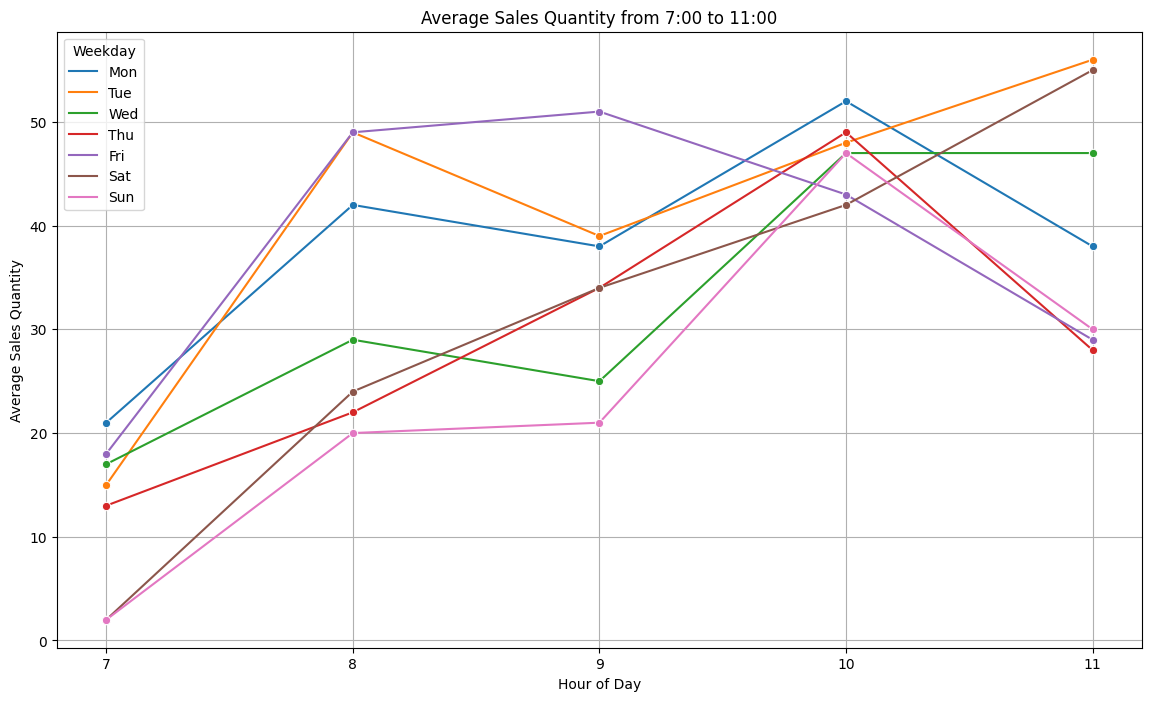

In [20]:

# --- Set your desired hour range ---
start_hour = 7  # Example: 9 AM
end_hour = 11   # Example: 5 PM (inclusive)

# Filter the DataFrame to include only the hours within the specified range
df_filtered_by_hour = average_sales_per_hour_weekday[
    (average_sales_per_hour_weekday['hour_of_day'] >= start_hour) &
    (average_sales_per_hour_weekday['hour_of_day'] <= end_hour)
]

# Reorder weekdays for plotting
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_filtered_by_hour['Weekday'] = pd.Categorical(df_filtered_by_hour['Weekday'], categories=weekday_order, ordered=True)
df_filtered_by_hour = df_filtered_by_hour.sort_values('Weekday')

# Create a line plot using the filtered data
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtered_by_hour, x='hour_of_day', y='average_sales', hue='Weekday', marker='o')

plt.title(f'Average Sales Quantity from {start_hour}:00 to {end_hour}:00')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sales Quantity')
# Update xticks to only show the hours present in the filtered data
plt.xticks(np.arange(start_hour, end_hour + 1, 1))
plt.grid(True)
plt.legend(title='Weekday')
plt.show()

## B >>> Café: o primeiro a chegar em reuniões 
Em quase todos os dias observados é sagrado tomar um café às 10:00 da manhã. É um parceiro indispensável do teclado ou da organização das ideias na cabeça, que vai se estender até pelo menos às 11:00.

## C >>> Recarga do almoço ou no papo das 16h
Se for Segunda ou Quarta, há café no almoço.
Para todos os outros dias, é sagradíssimo ter café no papo das 16:00. Ou será que é para acelerar a mente e as entregas?

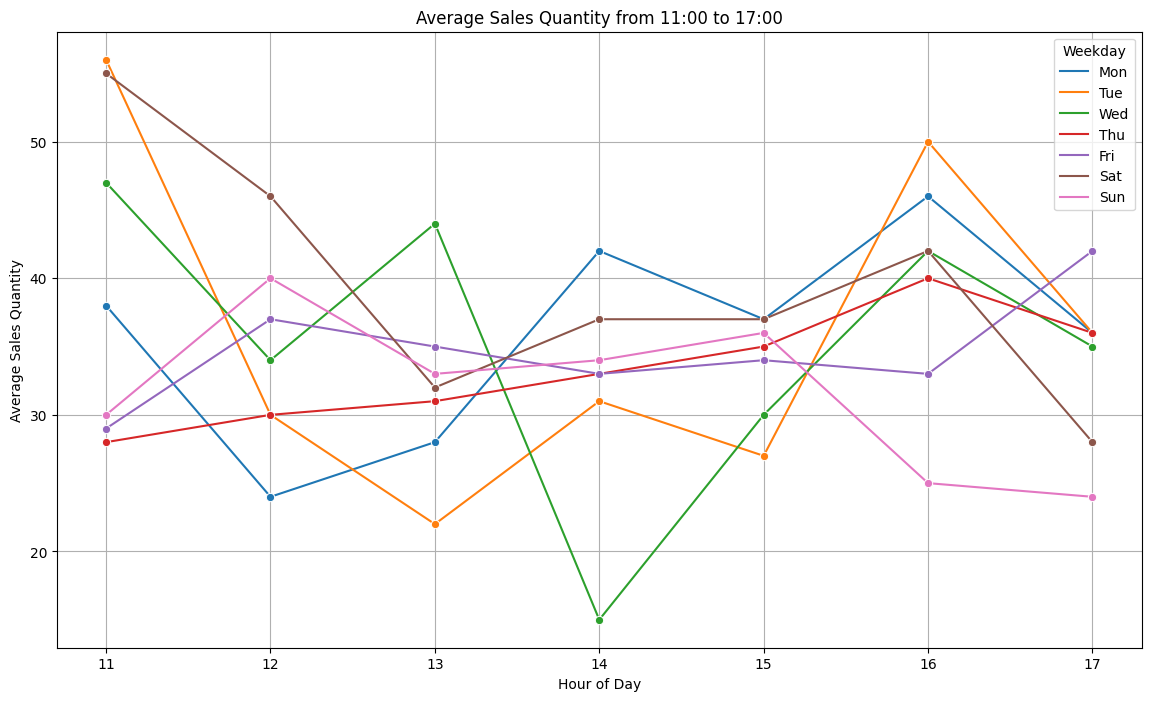

In [21]:

# --- Set your desired hour range ---
start_hour = 11  # Example: 9 AM
end_hour = 17   # Example: 5 PM (inclusive)

# Filter the DataFrame to include only the hours within the specified range
df_filtered_by_hour = average_sales_per_hour_weekday[
    (average_sales_per_hour_weekday['hour_of_day'] >= start_hour) &
    (average_sales_per_hour_weekday['hour_of_day'] <= end_hour)
]

# Reorder weekdays for plotting
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_filtered_by_hour['Weekday'] = pd.Categorical(df_filtered_by_hour['Weekday'], categories=weekday_order, ordered=True)
df_filtered_by_hour = df_filtered_by_hour.sort_values('Weekday')

# Create a line plot using the filtered data
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtered_by_hour, x='hour_of_day', y='average_sales', hue='Weekday', marker='o')

plt.title(f'Average Sales Quantity from {start_hour}:00 to {end_hour}:00')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sales Quantity')
# Update xticks to only show the hours present in the filtered data
plt.xticks(np.arange(start_hour, end_hour + 1, 1))
plt.grid(True)
plt.legend(title='Weekday')
plt.show()

## D >>> Café noturno, até cair no teclado
Consumo médio ao longo do dia, porém acentuado às 21:00 da `Quinta` e `Domingo`.
Supomos que seja devido à chegada do último e primeiro dia da semana. Ou seja: foi necessário "correr" para fazer todas as entregas necessárias e encerrar (ou começar) bem o ciclo.

# 8 De volta à primeira pergunta
## 8.1 Salto nas vendas, porém pouco faturamento
Temos uma amostra de quase 13 meses de observação, onde repete-se o mês de Março.
Isso nos levou a se questionar: `por qual motivo o observador teria executado novamente o mapeamento no mês de Março de 2025?`

Não conseguimos entender o motivo, mas percebemos que houve uma gigantesca variação de vendas e faturamento entre os meses selecionados.

Sales Quantity March 2024: 139<br>
Sales Quantity March 2025: 319<br>
**Sales variation: +129%<br>**

Total Revenue March 2024: 4639.40<br>
Total Revenue March 2025: 9986.44<br>
**Revenue variation: +115%<br>**

In [22]:
sales_count_2024 = 0
sales_count_2025 = 0
total_money_2024 = 0
total_money_2025 = 0

# Filter data for March 2024 up to day 23
march_2024_start = '2024-03-01'
march_2024_end = '2024-03-23'
df_march_2024 = df[(df['Date'] >= march_2024_start) & (df['Date'] <= march_2024_end)]

# Filter data for March 2025 - Assuming the data has entries for 2025 up to day 23
march_2025_start = '2025-03-01'
march_2025_end = '2025-03-23'
df_march_2025 = df[(df['Date'] >= march_2025_start) & (df['Date'] <= march_2025_end)]

# Check if data exists for March 2025
if df_march_2025.empty:
    print("No data found for March 2025 within the specified period.")
else:
    # Calculate sales quantity and total money for March 2024
    sales_count_2024 = len(df_march_2024)
    total_money_2024 = df_march_2024['money'].sum()

    # Calculate sales quantity and total money for March 2025
    sales_count_2025 = len(df_march_2025)
    total_money_2025 = df_march_2025['money'].sum()

    # Create a DataFrame for comparison
    comparison_data = {
        'Month': ['March 2024', 'March 2025'],
        'Sales Quantity': [sales_count_2024, sales_count_2025],
        'Total Revenue': [total_money_2024, total_money_2025]
    }
comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

sales_variation = ((sales_count_2025 - sales_count_2024) / sales_count_2024) * 100
revenue_variation = ((total_money_2025 - total_money_2024) / total_money_2024) * 100
print(f"Sales variation: {sales_variation:.1f}%")
print(f"Revenue variation: {revenue_variation:.1f}%")

,Month,Sales Quantity,Total Revenue
0,March 2024,139,4639.40
1,March 2025,319,9986.44


Sales variation: 129.5%
Revenue variation: 115.3%


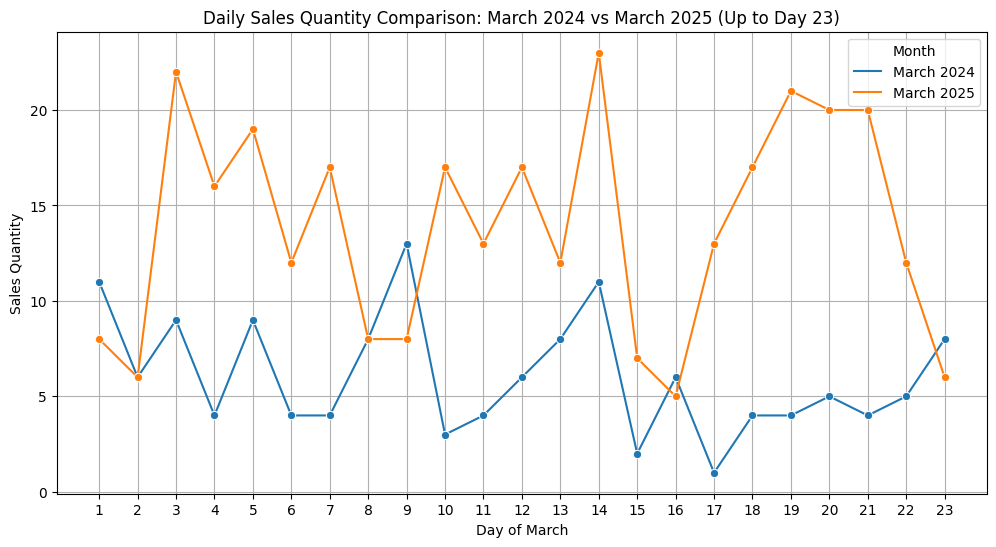

In [23]:
# Calculate daily sales count for March 2024
daily_sales_2024 = df_march_2024.groupby(df_march_2024['Date'].dt.day).size().reset_index(name='sales_count')
daily_sales_2024['Month'] = 'March 2024'

# Calculate daily sales count for March 2025
daily_sales_2025 = df_march_2025.groupby(df_march_2025['Date'].dt.day).size().reset_index(name='sales_count')
daily_sales_2025['Month'] = 'March 2025'

# Combine the dataframes for plotting
combined_daily_sales = pd.concat([daily_sales_2024, daily_sales_2025])

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_daily_sales, x='Date', y='sales_count', hue='Month', marker='o')

plt.title('Daily Sales Quantity Comparison: March 2024 vs March 2025 (Up to Day 23)')
plt.xlabel('Day of March')
plt.ylabel('Sales Quantity')
plt.xticks(combined_daily_sales['Date'].unique()) # Ensure all days are shown on x-axis
plt.grid(True)
plt.legend(title='Month')
plt.show()

## 8.2 O motivo: inflação no café
O fato é: em Março de 2025, os USA tiveram problemas ao suprir a cadeia de distribuição de café pelo território, o que impactou diretamente o preço do grão de café.

E como as pessoas contornaram a situação? Procurando outras opções de bebida na loja observada!

Já a loja, prevendo um possível baixo faturamento, possivelmente deve ter diminuído suas margens de lucro.

Fontes:
- https://news.crunchbase.com/agtech-foodtech/venture-funding-coffee-chocolate-alternative-startups/
- https://perfectdailygrind.com/2025/03/coffee-news-recap-7-march-2025/

In [24]:
sales_by_coffee_2024 = df_march_2024['coffee_name'].value_counts()
sales_by_coffee_2025 = df_march_2025['coffee_name'].value_counts()

coffee_name_comparison_data = pd.DataFrame({
    'Sales Quantity March 2024': sales_by_coffee_2024,
    'Sales Quantity March 2025': sales_by_coffee_2025
}).fillna(0).astype(int)

coffee_name_comparison_data['Variation (%)'] = (
    (coffee_name_comparison_data['Sales Quantity March 2025'] - coffee_name_comparison_data['Sales Quantity March 2024']) /
    coffee_name_comparison_data['Sales Quantity March 2024'] * 100
)

coffee_name_comparison_data.replace([np.inf, -np.inf], 0, inplace=True)
variation = coffee_name_comparison_data['Variation (%)'].fillna(0)
coffee_name_comparison_data['Variation (%)'] = variation.map('{:.1f}%'.format)

print("Sales count by coffee type:")
display(coffee_name_comparison_data)

Sales count by coffee type:


,Sales Quantity March 2024,Sales Quantity March 2025,Variation (%)
coffee_name,,,
Americano,28,102,264.3%
Americano with Milk,26,52,100.0%
Cappuccino,10,43,330.0%
Cocoa,5,30,500.0%
Cortado,21,2,-90.5%
Espresso,9,10,11.1%
Hot Chocolate,18,23,27.8%
Latte,22,57,159.1%
